In [3]:
#問題1 練習のために特徴量とカテゴリを選択
import matplotlib.pyplot as plt
import numpy as np
from  sklearn import datasets
%matplotlib inline
import pandas as pd

In [4]:
iris_df = datasets.load_iris()

In [5]:
data = iris_df['data']
df = pd.DataFrame(data=data)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
 print(np.unique(iris_df['target']))
#setosa = 0
#virgicolor=1
#virginica=2

[0 1 2]


In [12]:
y = pd.Series(iris_df['target'])
print(y.index)
df['target'] = y
df.head()
#print(y.head()==1)
subset1 = df.loc[df['target']!=0,:]
subset1.index = range(subset1.shape[0])
subset1.head()

RangeIndex(start=0, stop=150, step=1)


,sepal_length,sepal_width,petal_length,petal_width,target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [13]:
subset1_2var = subset1.loc[:,['sepal_length','petal_length','target']]
subset1_2var.head()

,sepal_length,petal_length,target
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


In [14]:
X = subset1_2var.loc[:,['sepal_length','petal_length']]
X.head()

,sepal_length,petal_length
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6


# 問題2 データの分析

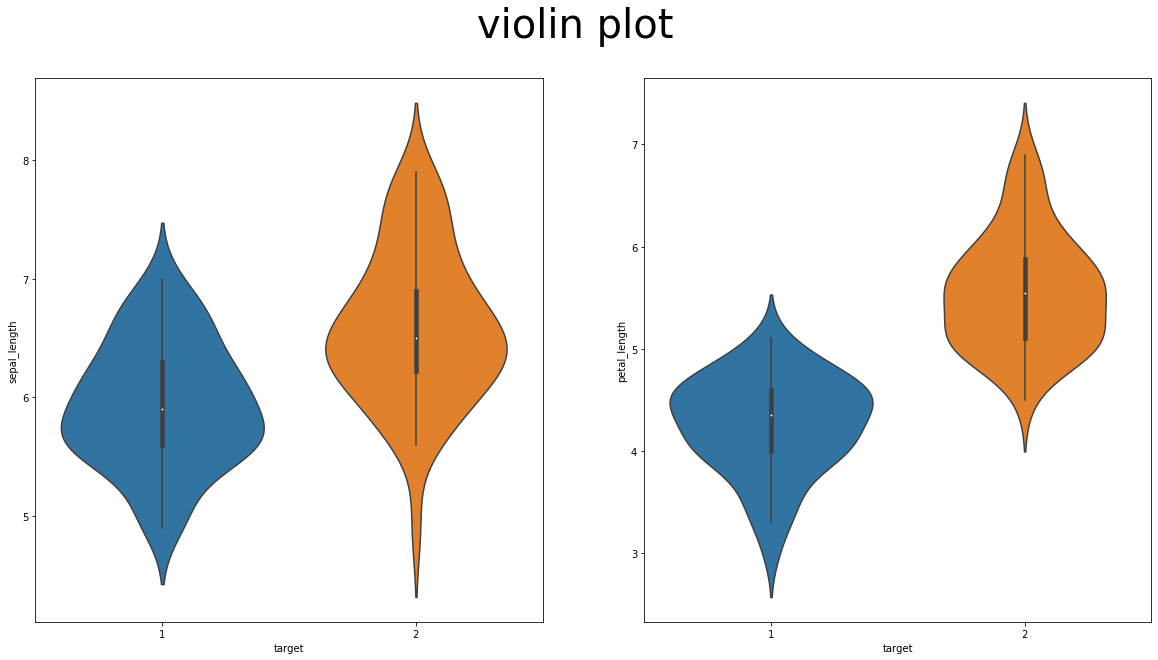

In [15]:
import seaborn as sns
fig = plt.figure(1,figsize=(20,10))
fig.suptitle('violin plot',size=40)
plt.subplot(1,2,1)
sns.violinplot(x='target',y='sepal_length',data=subset1_2var)
plt.subplot(1,2,2)
sns.violinplot(x='target', y='petal_length',data=subset1_2var)

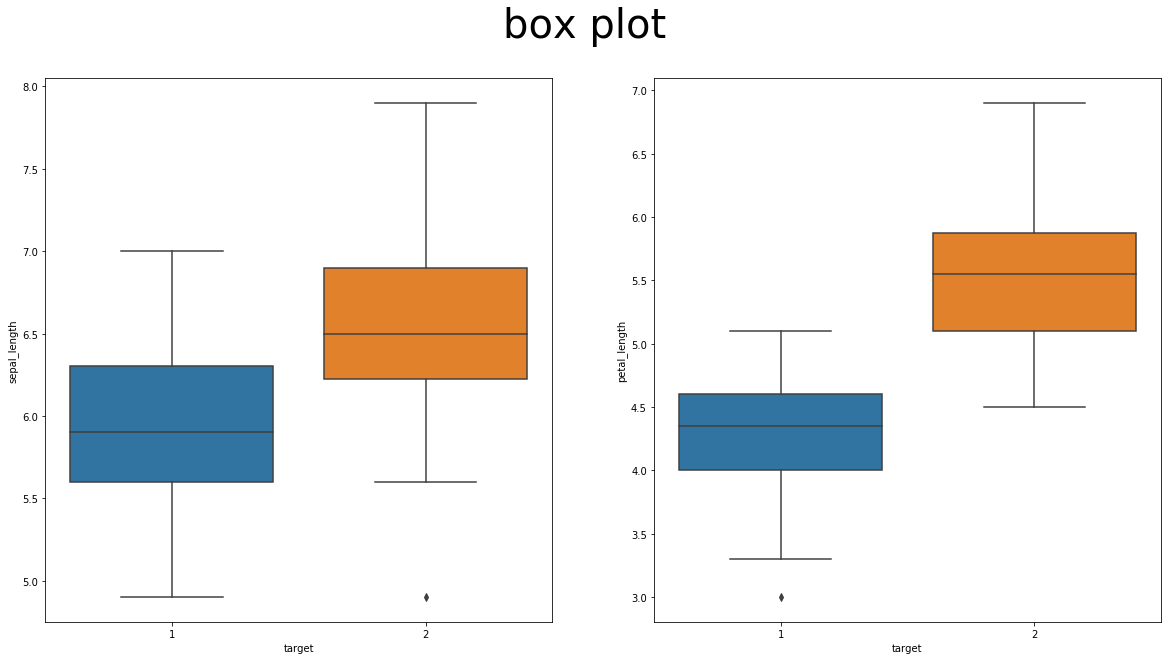

In [16]:
fig = plt.figure(1,figsize=(20,10))
fig.suptitle('box plot',size=40)
plt.subplot(1,2,1)
sns.boxplot(x='target',y='sepal_length',data=subset1_2var)
plt.subplot(1,2,2)
sns.boxplot(x='target', y='petal_length',data=subset1_2var)

Text(0.5, 1.0, 'virginica')

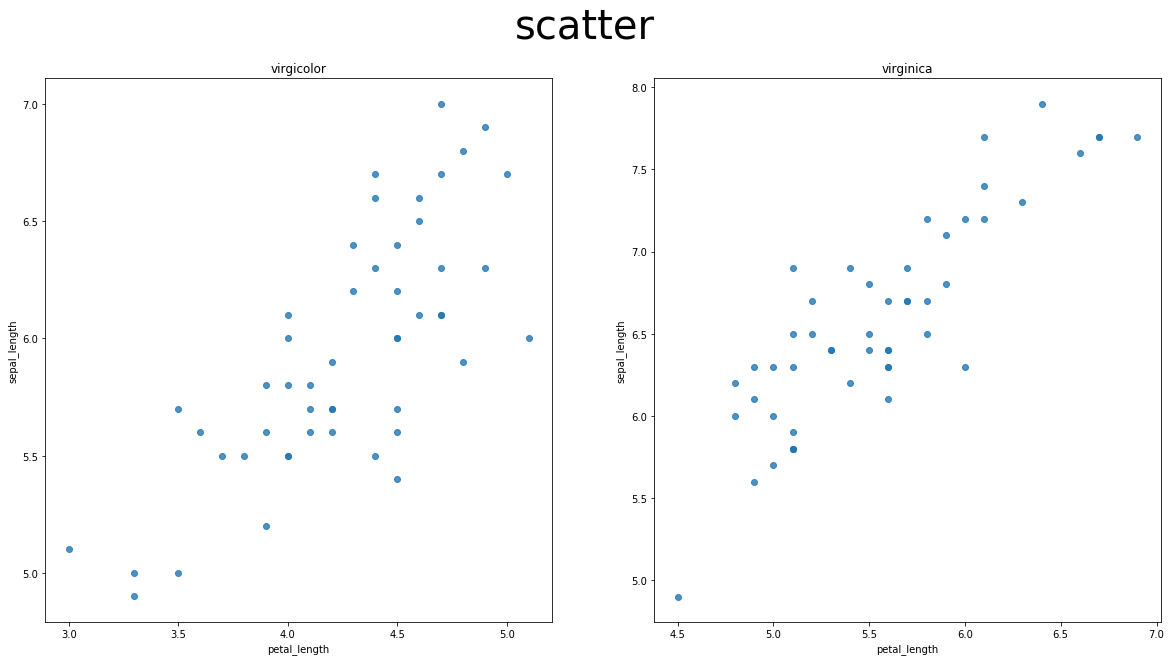

In [17]:
target_2var = subset1_2var['target']

fig = plt.figure(1,figsize=(20,10))
fig.suptitle('scatter',size=40)
plt.subplot(1,2,1)
sns.regplot(x='petal_length',y='sepal_length',
            data=subset1_2var.loc[target_2var==1,:],fit_reg=False)
plt.title('virgicolor')
plt.subplot(1,2,2)
sns.regplot(x='petal_length', y='sepal_length',
            data=subset1_2var.loc[target_2var==2,:],fit_reg=False)
plt.title('virginica')

# 問題3 前処理・訓練用データと検証用データの分割

In [18]:
#print(target_2var)
y = np.array(target_2var)
X = np.array(X)
print(type(X))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                    y,test_size=0.25,stratify=y)

<class 'numpy.ndarray'>


In [19]:
print(X_train.shape,X_test.shape)

(75, 2) (25, 2)


In [20]:
print(y_train.shape,y_test.shape)

(75,) (25,)


# 問題4 前処理・標準化

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 問題5 学習と推定

In [22]:
from sklearn.neighbors import KNeighborsClassifier as knn
nn_1  = knn(n_neighbors=1)
nn_3 = knn(n_neighbors=3)
nn_5 = knn(n_neighbors=5)
nn_1 = nn_1.fit(X_train,y_train)
nn_3 = nn_3.fit(X_train,y_train)
nn_5 = nn_5.fit(X_train,y_train)

In [23]:
nn_1_pred = nn_1.predict(X_test)
nn_3_pred = nn_3.predict(X_test)
nn_5_pred = nn_5.predict(X_test)
#推定結果を表示させる

# 問題6 評価

In [24]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score

In [25]:
acc_score = accuracy_score(y_test,nn_5_pred)
pre_score = precision_score(y_test,nn_5_pred)
re_score = recall_score(y_test,nn_5_pred)
f_score = f1_score(y_test,nn_5_pred)

In [32]:
#confusion_matrix
#際
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,nn_5_pred)

array([[ 9,  4],
       [ 0, 12]])

In [26]:
print('acc_score:{:.3f}'.format(acc_score))
print('pre_score:{:.3f}'.format(pre_score))
print('re_score:{:.3f}'.format(re_score))
print('f_score:{:.3f}'.format(f_score))

acc_score:0.840
pre_score:1.000
re_score:0.692
f_score:0.818


# 問題7 可視化

In [27]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

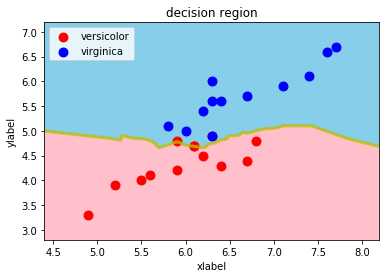

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
decision_region(X_test,y_test,nn_5)

# 問題8 他の手法の学習

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

lr = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

lr = lr.fit(X_train,y_train)
svc = svc.fit(X_train,y_train)
tree = tree.fit(X_train,y_train)
forest = forest.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_tree=tree.predict(X_test)
y_pred_forest=forest.predict(X_test)


pred_list = [y_pred_lr,y_pred_svc,y_pred_tree,y_pred_forest]
acc_list = []
pre_list = []
re_list = []
f_list = []

for i in range(len(pred_list)):
    acc_score = accuracy_score(y_test,pred_list[i])
    pre_score = precision_score(y_test,pred_list[i])
    re_score = recall_score(y_test,pred_list[i])
    f_score = f1_score(y_test,pred_list[i])
    acc_list.append(acc_score)
    pre_list.append(pre_score)
    re_list.append(re_score)
    f_list.append(f_score)

scores = pd.DataFrame(data={
    'acc':acc_list,
    'pre':pre_list,
    're':re_list,
    'f1':f_list},
                     index=['lr','svc','tree','forest'])
    
    #score_df = pd.DataFrame(data=scores)
    
    



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
#表
scores

,acc,pre,re,f1
lr,0.92,1.0,0.846154,0.916667
svc,0.92,1.0,0.846154,0.916667
tree,0.88,1.0,0.769231,0.869565
forest,0.88,1.0,0.769231,0.869565


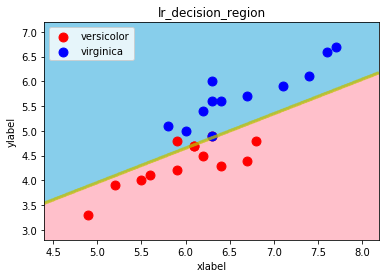

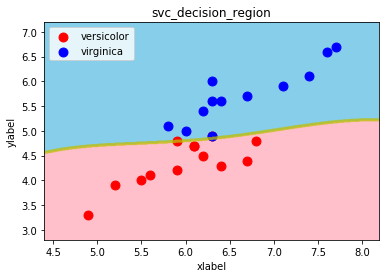

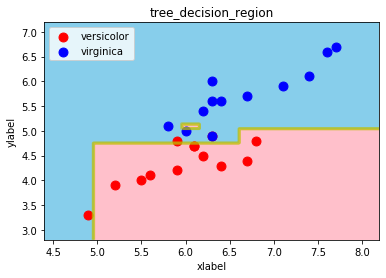

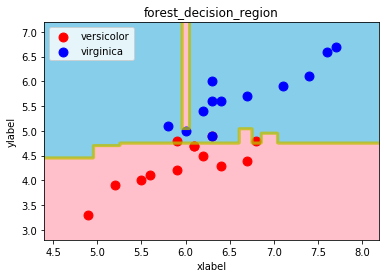

In [31]:
#可視化
estimators = [lr, svc, tree,forest]
estimator_names = ['lr', 'svc', 'tree','forest']
for i in range(len(estimators)):
    decision_region(X_test,y_test,estimators[i],
                    title=estimator_names[i] + '_decision_region')

以上、表とグラフから線形回帰が最も分類に置いて優れている事がわかる
ただし、ハイパーパラメータ次第でこの結果は変わる